In [12]:
%load_ext autoreload
%autoreload 2

import sys
import os
import inspect
import getpass

import pandas as pd
import matplotlib.pyplot as plt



project_path = os.path.abspath( os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe()))) + "/../" )
sys.path.insert(0, project_path)
print(project_path)

from database_storage.helper import *

from database_storage.database.database import *
from database_storage.main import *

from database_storage.objects.human import *
from database_storage.objects.issue import *
from database_storage.objects.kpi import *
from database_storage.objects.machine import *
from database_storage.objects.tag import *
from database_storage.objects.maintenanceworkorder import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/Users/sam11/Git/ml-py


## Connect to Database

In [13]:
databaseSchema_file = os.path.join(project_path ,'database_storage','database', 'DatabaseSchema.yaml')
databaseSchema_dict = openYAMLFile(databaseSchema_file)

yaml file open


In [20]:
#user = getpass.getuser()
#password = getpass.getpass("Password:")

user = "neo4j"
password = 'GREYSTONE!!'

database = DatabaseNeo4J("bolt://127.0.0.1:7687", user, password, databaseSchema_dict)

### get CSV information

In [16]:
csv_file = os.path.join(project_path ,'data', 'gs_data', 'gs_tool_tag_export.csv')
#csv_file = os.path.join(project_path ,'data', 'test.csv')

dataframe = pd.read_csv(csv_file)
dataframe.fillna("", inplace=True)

#csvSchemas_file = os.path.join(project_path , 'data', 'testCSVheader.yaml')
csvSchemas_file = os.path.join(project_path , 'data',  'gs_data', 'gs_CSVheader.yaml')

csvSchemas_dict = openYAMLFile(csvSchemas_file)

yaml file open


### Clean the database

In [5]:
database.deleteData()
database.dropIndexes()
database.createIndexes()

1

## Store the data

In [6]:
done = graphDatabase_from_TaggedCSV(database, dataframe, csvSchemas_dict)

100%|██████████| 3438/3438 [06:54<00:00,  8.30it/s]


# KPI

## Create the object for the KPI

In [17]:
kpiDict = {
    'issue':{
            'description_problem': None,
            'description_solution': None,
            'description_cause': None,
            'description_effect': None,
            'machine_down': None,
            'necessary_part': None,
            'part_in_process': None,

            'date_machine_down': None,
            'date_workorder_start': None,
            'date_maintenance_technician_arrive': None,
            'date_problem_found': None,
            'date_part_ordered': None,
            'date_part_received': None,
            'date_problem_solve': None,
            'date_machine_up': None,
            'date_workorder_completion': None
        },
    'human':{
        'name': None
    },
    'operator': {
        'name': None
    },
    'technician': {
        'name': None,
        'skills': None,
        'crafts': None
    },
    'machine': {
        'name': None,
        'manufacturer': None,
        'location': None
    },
    'machine_type': {
        'type': None
    },
    'tag': {
        'keyword': None,
        'synonyms':  None
    },
    'tag_oneGram': {
        'keyword':  None,
        'synonyms':  None
    },
    'tag_nGram': {
        'keyword':  None,
        'synonyms':  None
    },
    'tag_item': {
        'keyword':  ["low"],
        'synonyms':  None
    },
    'tag_itemAsProblem': {
        'keyword':  None,
        'synonyms':  None
    },
    'tag_itemAsSolution': {
        'keyword':  ["pin", "_"],
        'synonyms':  None
    },
    'tag_problem': {
        'keyword':  None,
        'synonyms':  None
    },
    'tag_solution': {
        'keyword':  None,
        'synonyms':  None
    },
    'tag_unknown': {
        'keyword':  None,
        'synonyms':  None
    },
    'tag_poblemItem': {
        'keyword':  None,
        'synonyms':  None
    },
    'tag_solutionItem': {
        'keyword':  ["_"],
        'synonyms':  None
    }
    }
kpi = Kpi(database, kpiDict)
kpi.createObjects()
print(kpi.tag_item)

OBJECT: <class 'database_storage.objects.tag.TagItem'>
	Keyword: ['low']
	Synonyms: None
	similarTo: None 
	children: None
	


## get the hierarchy of your item

In [18]:
g = kpi.tree_itemsHierarchie(child= True, parent=True)

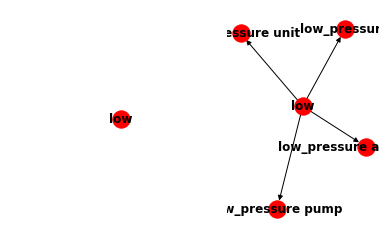

In [19]:
plt.subplot(121)
nx.draw(g[0][0], with_labels=True, font_weight='bold')
plt.subplot(122)
nx.draw(g[0][1], with_labels=True, font_weight='bold')

## Create the query to filter the dataframe

In [10]:
filterQuery = kpi.cypher_filterDatabase()
done, filterResult = database.runQuery(filterQuery)

dataframe = resultToObservationDataframe(filterResult)
dataframe

346it [00:00, 162511.67it/s]

tag_item
tag_itemAsSolution
tag_solutionItem


,tag_itemAsSolution.keyword,solutionitem_tag.keyword
0,pin,replaced pin
1,pin,replaced pin
2,pin,replaced pin
3,pin,replaced pin
4,pin,replaced pin
5,pin,replaced pin
6,pin,replaced pin
7,pin,replaced pin
8,pin,replaced pin
9,pin,replaced pin


In [ ]:
print(user)
print(password)